<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/dimensionality/0_%D0%A1%D1%8E%D1%80%D0%BF%D1%80%D0%B8%D0%B7%D1%8B_%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D1%85_%D0%B8%D0%B7%D0%BC%D0%B5%D1%80%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Сюрпризы высоких измерений

Наша интуиция о пространстве основана на двух и трех измерениях, и она часто может вводить в заблуждение, когда мы переходим к более высоким измерениям. Чтобы лучше понять особенности высокомерных пространств, полезно проанализировать форму и свойства некоторых базовых геометрических фигур, таких как сфера и куб, по мере увеличения их размерности. Изучая эти фигуры, мы можем получить представление о том, как геометрия ведет себя в высокомерных пространствах.



### 1.1 Геометрия d-мерной сферы

Рассмотрим единичную сферу в $d$ измерениях. Объем этой сферы задается формулой:

$$
V(d) = \frac{\pi^{d/2}}{\Gamma\left(\frac{d}{2} + 1\right)},
$$

где $\Gamma$ — это гамма-функция. Для положительных целых чисел $n$ гамма-функция удовлетворяет условию $\Gamma(n) = (n-1)!$. Используя формулу Стирлинга для аппроксимации гамма-функции, мы знаем, что:

$$
\Gamma(n) \sim \sqrt{2\pi} \, n^{n} e^{-n}.
$$

Из этого можно заметить, что $\Gamma\left(\frac{d}{2}\right)$ растет гораздо быстрее, чем $\pi^{d/2}$, по мере увеличения $d$. Следовательно, объем единичной сферы $V(d)$ стремится к нулю, когда размерность $d$ стремится к бесконечности:

$$
V(d) \to 0 \quad \text{при} \quad d \to \infty.
$$

Это означает, что единичная сфера в высоких измерениях имеет почти нулевой объем. Для сравнения, объем единичного куба в $d$ измерениях остается постоянным и равным 1, независимо от размерности.

Еще одно удивительное свойство высокомерных сфер заключается в том, что большая часть их объема сосредоточена вблизи границы. Для $d$-мерной сферы радиуса $r$ большая часть объема находится в тонком кольце (области в форме кольца) шириной, пропорциональной $\frac{r}{d}$. Это явление можно визуализировать, представив, что мы чистим высокомерный апельсин: почти вся масса апельсина будет находиться в кожуре, оставляя почти ничего внутри.


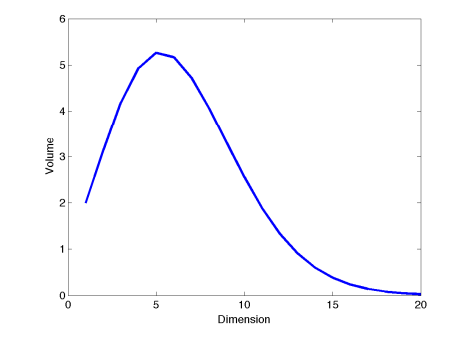


**Рисунок 1**: Объем единичной сферы по мере увеличения размерности. Объем быстро уменьшается до нуля с ростом размерности.


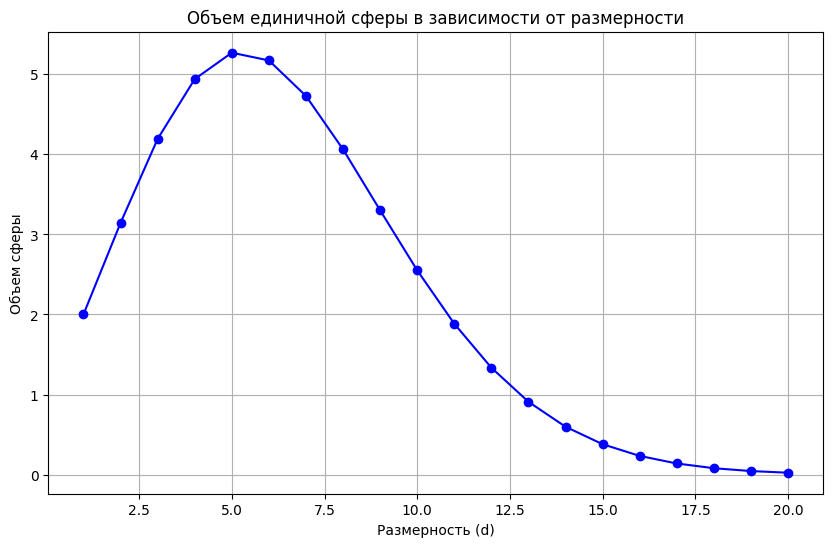

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Функция для вычисления объема d-мерной единичной сферы
def sphere_volume(d):
    return np.pi ** (d / 2) / gamma(d / 2 + 1)

# Размерности от 1 до 20
dimensions = np.arange(1, 21)
volumes = [sphere_volume(d) for d in dimensions]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(dimensions, volumes, marker='o', linestyle='-', color='b')
plt.title('Объем единичной сферы в зависимости от размерности')
plt.xlabel('Размерность (d)')
plt.ylabel('Объем сферы')
plt.grid(True)
plt.show()

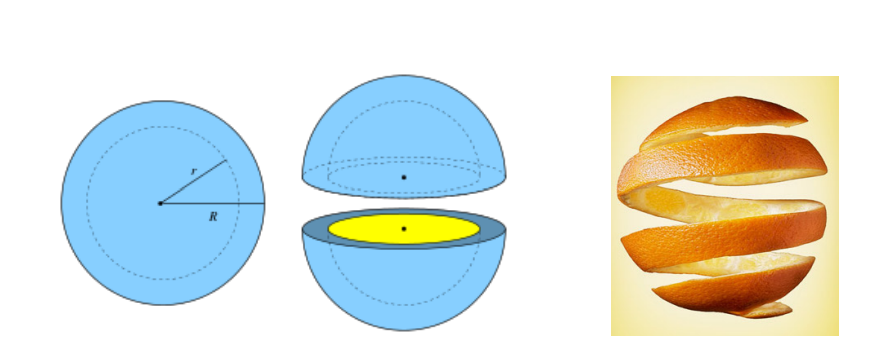


**Рисунок 2**: Большая часть объема высокомерной сферы сосредоточена вблизи ее границы. Это означает, что если очистить высокомерный апельсин, то почти ничего не останется.


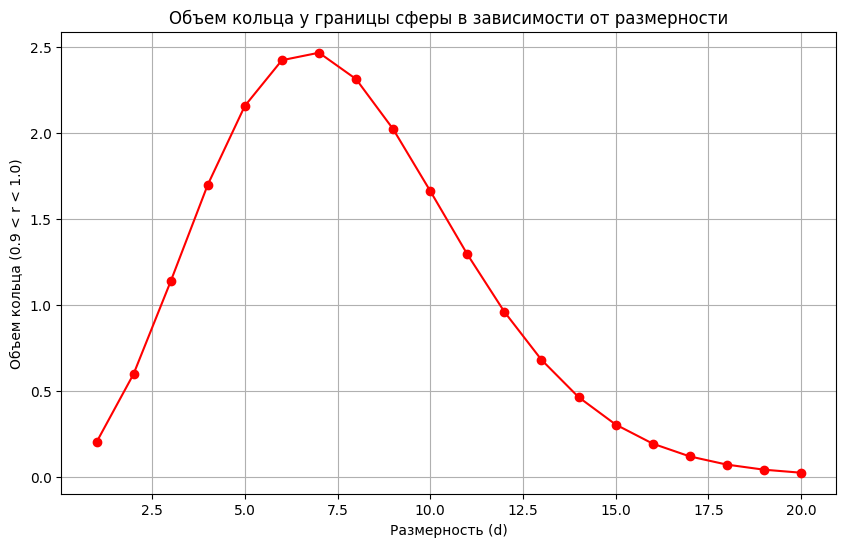

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления объема кольца в d-мерной сфере
def ring_volume(d, r_inner, r_outer):
    return sphere_volume(d) * (r_outer**d - r_inner**d)

# Размерности от 1 до 20
dimensions = np.arange(1, 21)

# Радиусы для кольца (например, 0.9 до 1.0)
r_inner = 0.9
r_outer = 1.0

# Вычисление объема кольца для каждой размерности
ring_volumes = [ring_volume(d, r_inner, r_outer) for d in dimensions]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(dimensions, ring_volumes, marker='o', linestyle='-', color='r')
plt.title('Объем кольца у границы сферы в зависимости от размерности')
plt.xlabel('Размерность (d)')
plt.ylabel('Объем кольца (0.9 < r < 1.0)')
plt.grid(True)
plt.show()




### 1.2 Геометрия d-мерного куба

В отличие от сферы, высокомерный куб демонстрирует другое поведение. Ключевое наблюдение заключается в том, что большая часть объема высокомерного куба сосредоточена в его углах. Это можно продемонстрировать с помощью вероятностного аргумента.

#### Вероятностный аргумент

Рассмотрим $d$-мерный куб, заданный интервалом $[-1, 1]^d$. Мы случайным образом выбираем точку внутри этого куба и вычисляем вероятность того, что эта точка также лежит внутри единичной сферы с центром в начале координат.

Пусть $\mathbf{x} = [x_1, x_2, \dots, x_d]$ — точка в $\mathbb{R}^d$, где каждая координата $x_i$ выбирается равномерно случайным образом из интервала $[-1, 1]$. Условие того, что $\mathbf{x}$ лежит внутри единичной сферы, записывается как:

$$
\|\mathbf{x}\|^2 = \sum_{i=1}^d x_i^2 \leq 1.
$$

Пусть $z_i = x_i^2$. Математическое ожидание $z_i$ равно:

$$
\mathbb{E}(z_i) = \int_{-1}^1 t^2 \, dt = \frac{1}{3}.
$$

Таким образом, математическое ожидание $\|\mathbf{x}\|^2$ равно:

$$
\mathbb{E}\left(\|\mathbf{x}\|^2\right) = \sum_{i=1}^d \mathbb{E}(z_i) = \frac{d}{3}.
$$

Дисперсия $z_i$ равна:

$$
\text{Var}(z_i) = \mathbb{E}(z_i^2) - \left(\mathbb{E}(z_i)\right)^2 = \int_{-1}^1 t^4 \, dt - \left(\frac{1}{3}\right)^2 = \frac{1}{5} - \frac{1}{9} = \frac{4}{45}.
$$

Используя неравенство Чернова, мы можем оценить вероятность того, что $\|\mathbf{x}\|^2 \leq 1$:

$$
P\left(\|\mathbf{x}\|^2 \leq 1\right) = P\left(\sum_{i=1}^d z_i \leq 1\right) \leq \exp\left(-\frac{d}{10}\right).
$$

По мере увеличения размерности $d$ эта вероятность быстро стремится к нулю. Это означает, что случайно выбранная точка в высокомерном кубе с большой вероятностью не будет лежать внутри единичной сферы. Другими словами, почти весь объем куба сосредоточен в его углах.

**Неравенство Чернова**: Пусть $X_1, X_2, \dots, X_n$ — независимые случайные величины с нулевым средним, такие что $|X_i| \leq 1$ почти наверное. Тогда для любого $t > 0$:

$$
P\left(\sum_{i=1}^n X_i \geq t\right) \leq \max\left(e^{-\frac{t^2}{4\sigma^2}}, e^{-\frac{t}{2}}\right),
$$

где $\sigma^2 = \sum_{i=1}^n \text{Var}(X_i)$.



### 1.3 Сравнение d-мерной сферы и куба

Сравним единичный $d$-мерный куб (с длиной стороны 1) и единичную $d$-мерную сферу (с радиусом 1) по мере увеличения размерности $d$.


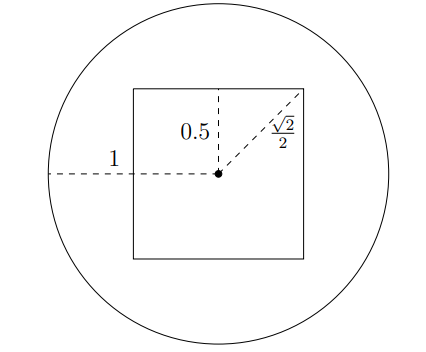


**Рисунок 3**: Двумерная единичная сфера и единичный куб, оба с центром в начале координат.

В двух измерениях единичный квадрат полностью содержится внутри единичной сферы. Расстояние от центра куба до вершины (радиус описанной сферы или длина диагонали куба) равно $\sqrt{2}$, а апофема (радиус вписанной сферы) равна $\frac{1}{2}$.

В четырех измерениях (**Рисунок 4**) расстояние от центра до вершины равно 1, что означает, что вершины куба касаются поверхности сферы. Однако апофема остается равной $\frac{1}{2}$. При проекции на двумерное пространство куб перестает выглядеть выпуклым, хотя все гиперкубы являются выпуклыми. Это одно из странных свойств высокомерных пространств: гиперкубы одновременно выпуклые и "остроконечные".

В размерностях больше 4 расстояние от центра до вершины равно $\sqrt{d}$, что больше 1. Таким образом, вершины гиперкуба выходят далеко за пределы сферы. Это приводит к необычным визуализациям высокомерных кубов, как показано на **Рисунке 6** и **Рисунке 7**.



### 2. Проклятия и благословения размерности

#### 2.1 Проклятия размерности

Термин "проклятие размерности" был введен Ричардом Беллманом в 1957 году. Он описывает проблемы, возникающие из-за экспоненциального роста объема при добавлении дополнительных измерений в евклидово пространство.


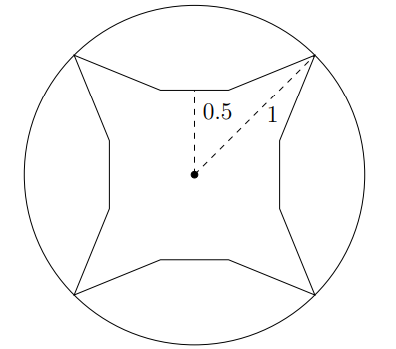

Рисунок 4: Проекции 4-мерной единичной сферы и единичного куба с центром в начале координат
(показаны 4 из 16 вершин гиперкуба).

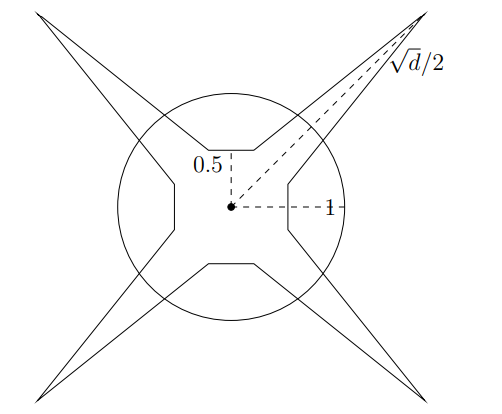

Рисунок 5: Проекции d-мерной единичной сферы и единичного куба с центром в начале координат
(показаны 4 из $2^d$ вершин гиперкуба).


Например, рассмотрим выборку интервала $[0, 1]$ с использованием 100 равномерно распределенных точек, что дает расстояние 0.01 между соседними точками. Чтобы достичь такого же расстояния в единичном квадрате $[0, 1] \times [0, 1]$, потребуется $100^2 = 10,000$ точек. Если мы расширим это до 10-мерного единичного куба, то потребуется $100^{10} = 10^{20}$ точек. Этот экспоненциальный рост количества точек, необходимых для поддержания той же плотности выборки, является проявлением проклятия размерности.

Даже если сложность не увеличивается экспоненциально, вычислительная стоимость алгоритмов часто плохо масштабируется с увеличением размерности. Например, поиск ближайшего соседа среди $n$ точек в $d$ измерениях с использованием наивного подхода требует $O(n^2 d)$ операций. В то же время для $d = 1$ задача может быть решена за $O(n \log n)$ операций путем сортировки точек. Для больших наборов данных ($n \gg 1$) в высоких измерениях ($d \gg 1$) сложность $O(n^2 d)$ может стать непомерно высокой.




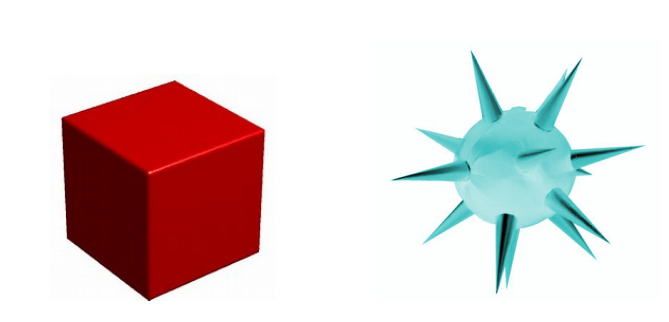

Рисунок 6: Представления 16-мерного гиперкуба. Оба представления верны,
каждое из них отражает различные особенности гиперкуба.

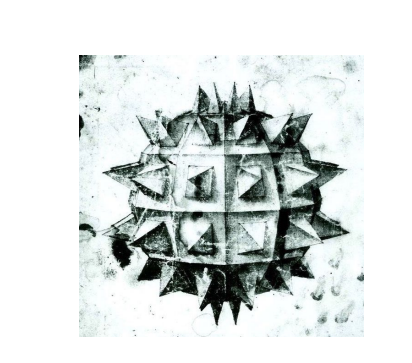

Рисунок 7: Художественное изображение 72-мерного гиперкуба? (Рисунок Паоло Уччелло XV века.)

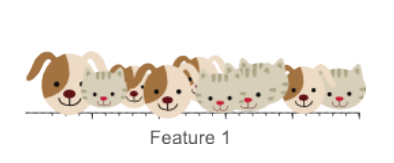

**Рисунок 8**: Классификация с использованием 1 признака.  


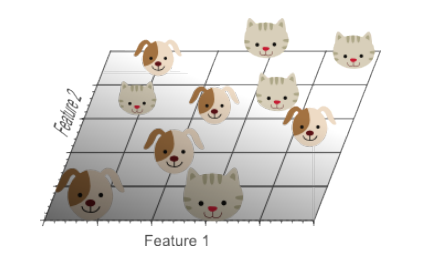

**Рисунок 9**: Классификация с использованием 2 признаков.

















### Проклятие размерности и его проявления в классификации

Проклятие размерности также проявляется в соотношении между количеством обучающих данных и числом признаков, необходимых для успешной классификации. Этот пример и изображения ниже взяты из блога Винсента Спрюйта (VP Chief Scientist в Sentiance).

Предположим, у нас есть изображения кошек и собак, и мы хотим создать алгоритм, который сможет корректно классифицировать эти изображения на кошек и собак. Для конкретности предположим, что у нас есть обучающий набор из 10 размеченных изображений кошек и собак, а также большее количество немаркированных изображений. Мы начинаем с использования одного признака для попытки разделить кошек и собак. Например, мы можем использовать количество красных пикселей. С одним признаком мы не сможем разделить обучающие изображения на два класса, как показано на **Рисунке 8**.

Поэтому мы можем решить добавить второй признак, например, среднее значение зеленого цвета на изображении. Однако добавление второго признака все еще не приводит к линейно разделимой задаче классификации: ни одна прямая линия не может разделить всех кошек и всех собак в этом примере, как показано на **Рисунке 9**.

Наконец, мы решаем добавить третий признак, например, среднее значение синего цвета на изображении, что создает трехмерное пространство признаков, как показано на **Рисунке 10**. Добавление третьего признака делает задачу классификации линейно разделимой в нашем примере. Существует плоскость, которая идеально разделяет собак и кошек, как показано на **Рисунке 10**.


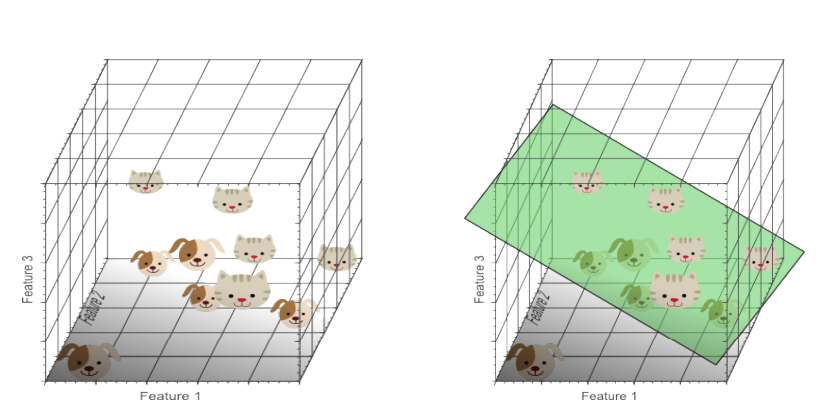


**Рисунок 10**: Классификация с использованием 3 признаков. (Изображения Винсента Спрюйта)

В трехмерном пространстве признаков мы можем найти плоскость, которая идеально разделяет собак и кошек. Это означает, что линейная комбинация трех признаков может быть использована для получения идеальных результатов классификации на нашем обучающем наборе из 10 изображений.

Вышеприведенные иллюстрации могут создать впечатление, что увеличение числа признаков до достижения идеальной классификации — это лучший способ обучения классификатора. Однако это не так. Если мы продолжим добавлять признаки, размерность пространства признаков будет расти, и оно станет все более разреженным. Из-за этой разреженности становится гораздо проще найти разделяющую гиперплоскость, поскольку вероятность того, что обучающий образец окажется на неправильной стороне лучшей гиперплоскости, становится бесконечно малой при увеличении числа признаков. Однако, если объем доступных обучающих данных фиксирован, то добавление измерений приводит к переобучению. Это означает, что мы идеально разделяем обучающие данные, но при попытке классификации на новых данных алгоритм будет давать катастрофически плохие результаты. С другой стороны, если мы продолжаем добавлять измерения, объем обучающих данных должен расти экспоненциально быстро, чтобы сохранить ту же плотность покрытия и избежать переобучения.



### 2.2 Благословения размерности

Благословения размерности включают в себя явление концентрации меры (так называемое в геометрии банаховых пространств), которое означает, что определенные случайные флуктуации очень хорошо контролируются в высоких измерениях, а также успех асимптотических методов, широко используемых в математической статистике и статистической физике. Эти методы позволяют делать утверждения о ситуациях в очень высоких размерностях, где умеренные размерности были бы слишком сложны для анализа.

Наиболее известным примером является Закон Больших Чисел, который, вкратце, гласит, что сумма независимых, одинаково распределенных случайных величин приблизительно нормально распределена. Мы наблюдаем такие благословения, или явления концентрации меры, например, в физике. Очень сложно предсказать поведение отдельных атомов в газе. Тем не менее, мы можем очень точно предсказать поведение газа в целом, потому что можем делать достаточно точные утверждения о поведении, усредненном по миллионам атомов.

Существует огромное количество таких явлений концентрации, которые распространяются от скаляров на векторы и матрицы. Эти обобщения часто значительно упрощают нашу жизнь в машинном обучении. Вот один из примеров благословений размерности из теории случайных матриц. Число обусловленности матрицы (отношение ее наибольшего сингулярного числа к наименьшему) является важной мерой ее устойчивости к шуму при решении системы линейных уравнений. В общем случае очень сложно или даже невозможно предсказать число обусловленности матрицы без явного доступа ко всем ее элементам. Однако для матриц, элементы которых выбраны случайно, мы часто можем дать довольно точный прогноз числа обусловленности на основе очень небольшого числа параметров, таких как размеры матрицы.

**Теорема 2.1**. Пусть $A$ — матрица размерности $d \times n$ (где $d \geq n$), элементы которой являются независимыми стандартными нормальными случайными величинами. Пусть $\sigma_{\text{min}}$ и $\sigma_{\text{max}}$ — наименьшее и наибольшее сингулярные числа матрицы $A$ (т.е. наименьшее и наибольшее собственные значения матрицы $A^*A$) соответственно. Пусть $\gamma = \frac{d}{n}$, и пусть $\kappa(A) = \frac{\sigma_{\text{max}}}{\sigma_{\text{min}}}$ обозначает число обусловленности матрицы $A$. Тогда, при $d \to \infty$ и $n \to \infty$ (но с фиксированным $\gamma = \frac{d}{n}$):

$$
\kappa(A) \to \frac{1 + \sqrt{\gamma}}{1 - \sqrt{\gamma}}.
$$



### Доказательство:

1. **Сингулярные числа случайных матриц:**
   - Матрица $A$ имеет размер $d \times n$, и её элементы — независимые стандартные нормальные случайные величины.
   - Сингулярные числа матрицы $A$ связаны с собственными значениями матрицы $A^*A$, где $A^*$ — сопряжённая (транспонированная) матрица $A$.
   - Матрица $A^*A$ является симметричной и положительно определённой, её собственные значения $\lambda_1, \lambda_2, \dots, \lambda_n$ связаны с сингулярными числами $\sigma_i$ соотношением $\sigma_i = \sqrt{\lambda_i}$.

2. **Асимптотическое поведение собственных значений:**
   - При $d \to \infty$ и $n \to \infty$ с фиксированным $\gamma = \frac{d}{n}$, собственные значения матрицы $A^*A$ подчиняются закону Марченко-Пастура.
   - Закон Марченко-Пастура описывает распределение собственных значений случайных матриц. Для матрицы $A^*A$ спектральная плотность $\rho(\lambda)$ имеет вид:
$$
     \rho(\lambda) = \frac{\sqrt{(\lambda_{\text{max}} - \lambda)(\lambda - \lambda_{\text{min}})}}{2\pi\gamma\lambda},
$$
     где $\lambda_{\text{min}} = (1 - \sqrt{\gamma})^2$ и $\lambda_{\text{max}} = (1 + \sqrt{\gamma})^2$.

3. **Наибольшее и наименьшее сингулярные числа:**
   - Наибольшее сингулярное число $\sigma_{\text{max}}$ соответствует $\sqrt{\lambda_{\text{max}}} = 1 + \sqrt{\gamma}$.
   - Наименьшее сингулярное число $\sigma_{\text{min}}$ соответствует $\sqrt{\lambda_{\text{min}}} = 1 - \sqrt{\gamma}$.

4. **Число обусловленности:**
   - Число обусловленности $\kappa(A)$ определяется как отношение наибольшего сингулярного числа к наименьшему:
$$
     \kappa(A) = \frac{\sigma_{\text{max}}}{\sigma_{\text{min}}}.
$$
   - Подставляя асимптотические выражения для $\sigma_{\text{max}}$ и $\sigma_{\text{min}}$, получаем:
$$
     \kappa(A) \to \frac{1 + \sqrt{\gamma}}{1 - \sqrt{\gamma}}.
$$



В Питоне мы можем сгенерировать матрицу $A$ с помощью команды `A = randn(d, n)`. **Рисунок 11** показывает распределение числа обусловленности $\kappa(A)$ для матрицы размерности $1000 \times 250$ с нормально распределенными элементами для 10,000 различных реализаций матрицы $A$. Можно четко увидеть, насколько хорошо $\kappa(A)$ концентрируется вокруг значения $\frac{1 + \sqrt{\gamma}}{1 - \sqrt{\gamma}}$ (которое в данном случае равно 3).


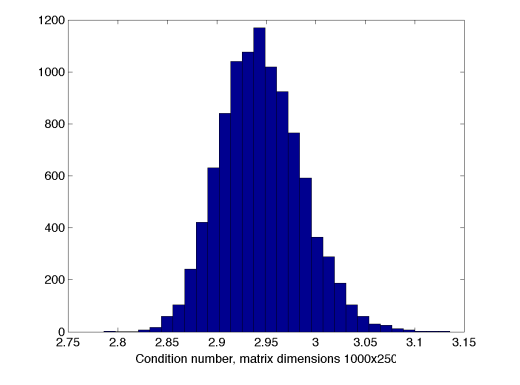


**Рисунок 11**: Концентрация числа обусловленности гауссовской случайной матрицы.



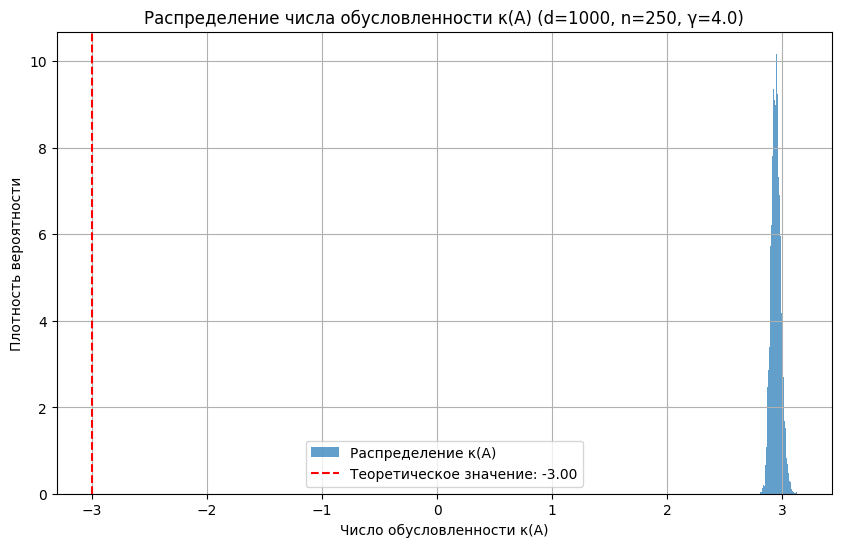

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
d = 1000  # Количество строк
n = 250   # Количество столбцов
gamma = d / n
num_trials = 10000  # Количество реализаций матрицы A

# Вычисление числа обусловленности для каждой реализации
kappa_values = []
for _ in range(num_trials):
    A = np.random.randn(d, n)  # Генерация случайной матрицы
    sigma_min = np.linalg.svd(A, compute_uv=False)[-1]  # Наименьшее сингулярное число
    sigma_max = np.linalg.svd(A, compute_uv=False)[0]   # Наибольшее сингулярное число
    kappa = sigma_max / sigma_min  # Число обусловленности
    kappa_values.append(kappa)

# Теоретическое значение
kappa_theoretical = (1 + np.sqrt(gamma)) / (1 - np.sqrt(gamma))

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(kappa_values, bins=50, density=True, alpha=0.7, label='Распределение κ(A)')
plt.axvline(kappa_theoretical, color='r', linestyle='--', label=f'Теоретическое значение: {kappa_theoretical:.2f}')
plt.title(f'Распределение числа обусловленности κ(A) (d={d}, n={n}, γ={gamma})')
plt.xlabel('Число обусловленности κ(A)')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()



### Заключение

Проклятие размерности подчеркивает сложности, связанные с увеличением размерности пространства признаков, особенно в контексте классификации и переобучения. Однако высокие размерности также приносят свои "благословения", такие как явление концентрации меры, которое позволяет нам делать точные предсказания в сложных системах. Понимание этих явлений крайне важно для разработки эффективных алгоритмов машинного обучения и анализа данных в высокомерных пространствах.
